<a href="https://colab.research.google.com/github/Aleksandrovna15/MAT-421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module D - Alisa Fedorova**

1.1 Introduction to Linear Algebra
*   Linear Algebra is widely used in various fields including data science and machine learning.
*   It mainly deals with concept related to matrix and vector mathematics.

In [3]:
import numpy as np

# a way to set up a vector in Python
vector_row = np.array([[1, 5, 2, 0, -6, -3]])
vector_column = np.array([[1], [2], [3], [4], [5]])

# vectors, like matrices, have dimentions except that vectors will always have one of their dimentions as one
print("Shape of vector row   : ", vector_row.shape)
print("Shape of vector column: ", vector_column.shape)

#we can perform many operations with them like mutiplication
# Calculating the cross product of two arrays
v = np.array([[5, -3, 1]])
w = np.array([[-9, -1, 2]])

print("Cross Product of V and W: " , np.cross(v, w))

Shape of vector row   :  (1, 6)
Shape of vector column:  (5, 1)
Cross Product of V and W:  [[ -5 -19 -32]]


Matrices are just many vectors combined whether it be a combination of rows or columns. Thus, while following certain rules like dimention limitations, we can perform same operations with matrices.

1.2 Elements of Linear Algebra
*   Linear combination: a new vector constructed from a subset by multiplying each vector by a constant and adding the results.
*   Linear subspace: a result of linear combination, A subset U ⊆ V that is closed under vector addition and scalar multiplication
   *   for all u1, u2 ∈ U and A ∈ R, u1 + u2 ∈ U, and
A u1 ∈ U.

In [2]:
import numpy as np

# linear combination
v = np.array([[0, 3, 2]])
w = np.array([[4, 1, 1]])
u = np.array([[0, -2, 0]])
x = 3*v-2*w+4*u
print(x)

[[-8 -1  4]]


*   Span: the set of all linear combinations, also refered to as spanning set.
*   Column space: If matrix A is declared, the column space of A is the span of the columns of A. Denoted as col(A).
*   Linear independence: A list of vectors is linearly independent of none of them can be written as a linear combination of the others (like one vector being a multiple of another).
    *   A list of vectors is called linearly dependent of it is not linearly independent.

In [3]:
# If we have a square matrix, then we can use the determinant of the matrix to find out if it is independent or not
# if the determinant is 0 it it dependent, otherwise independent.

A=np.array([[9, -9, 0], [4, 1, 7], [6, -1, 12]])
print(np.linalg.det(A))

225.0


Dimension Theorem
*   Let U be a linear subspace of V. Any basis of U always has the same number of elements. All bases of U have the same length, that is, the same number of elements. We call this number the dimension of U and denote it dim(U).

*   Orthonormal Bases: A list of vectors is orthonormal if the vectors are pairwise orthogonal and each has norm 1.
    *   norm = ⟨u, v⟩ = u · v

In [4]:
# we can find the norm using python
import numpy as np
vector_row = np.array([[1, -5, 3, 2, 4]])
vector_column = np.array([[1],
                          [2],
                          [3],
                          [4]])
print(vector_row.shape)
print(vector_column.shape)

(1, 5)
(4, 1)


*   Best Approximation Theorem: Let U ⊆ V be a linear subspace with orthonormal basis and v ∊ V. For any u ∊ U: ||v-Pu v|| <= ||v-u||
*   Pythagorean Theorem: Let u, v ∈ V be orthogonal. Then ∥u+v∥^2 = ∥u∥^2 + ∥v∥^2
*   Eigenvalues and Eigenvectors
    *   Where A is n×n matrix, x is n×1 column vector (X≠0), and λ is some scalar. Any λ that satisfies the Ax = λx equation is known as an eigenvalue of the matrix A, while the associated vector x is called an eigenvector corresponding to λ.


In [5]:
import numpy as np
from numpy.linalg import eig
a = np.array([[0, 2],
              [2, 3]])
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)

E-value: [-1.  4.]
E-vector [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


1.3 Linear Regression
*   QR decomposition is a useful procedure to solve the linear least squares
problem.

In [7]:
import numpy as np
from numpy.linalg import qr

a = np.array([[1, 5, -1],
              [2, 3, 5],
              [6, 9, 0]])
p = [1, 5, 10, 20]

# Eigenvalues will eventually converge
for i in range(20):
    q, r = qr(a)
    a = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(a)

Iteration 1:
[[ 5.48780488 -5.61497106  9.18588525]
 [ 0.07712872  0.01219512 -3.6700834 ]
 [ 4.44478318  0.70278193 -1.5       ]]
Iteration 5:
[[ 9.78877379  1.06211496  6.63204595]
 [ 0.19461677 -2.66412972 -4.89319541]
 [-0.03460202  0.47367069 -3.12464407]]
Iteration 10:
[[ 9.79234581e+00 -2.37181505e+00  6.19511859e+00]
 [-9.89314513e-04 -3.73385165e+00  4.85121608e+00]
 [-1.65809166e-04 -6.25793737e-01 -2.05849416e+00]]
Iteration 20:
[[ 9.79246615e+00 -2.73482821e+00 -6.04298059e+00]
 [-2.04764436e-09 -7.74879063e-01  3.55500762e+00]
 [-5.08027439e-09 -1.92250097e+00 -5.01758709e+00]]


*   Least Square Regression: finding the parameters of the estimation function that minimize the total squared error

[[1.57375762]
 [0.97861023]]


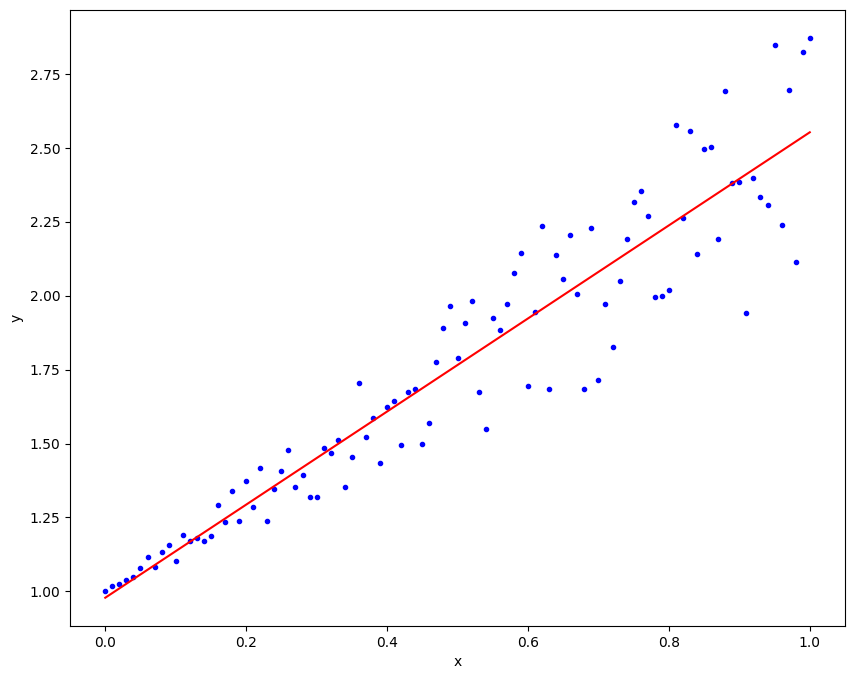

In [9]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()